In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=6.439900465824522 et b_1=4.910292609234713


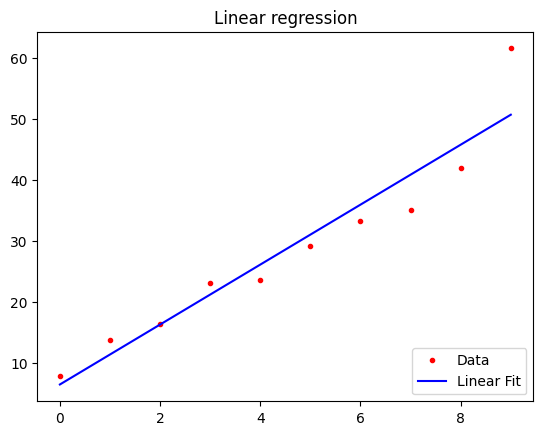

In [6]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 





Essai numero 1
b_0=10.448988158043171 et b_1=3.8603783072679416
s2=4.475411120587929


Essai numero 2
b_0=9.474456100319639 et b_1=3.8559159587095917
s2=3.670523913505791


Essai numero 3
b_0=9.964645722447539 et b_1=4.067918753326098
s2=8.021124118748183


Essai numero 4
b_0=9.892063968997633 et b_1=4.028893917000386
s2=3.275878265487435


Essai numero 5
b_0=10.612607216280573 et b_1=3.967973960317215
s2=12.80255097295768


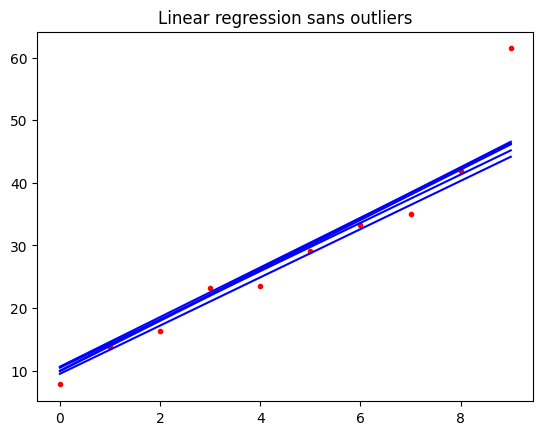



Essai numero 1
b_0=9.93531583661284 et b_1=4.574178597547999
s2=44.364786277693305


Essai numero 2
b_0=7.3812589472890515 et b_1=5.008060737714345
s2=38.422172525374584


Essai numero 3
b_0=7.98328513448871 et b_1=5.247975764172913
s2=49.52626882357361


Essai numero 4
b_0=7.762781933824201 et b_1=5.213845609454986
s2=23.694256029587677


Essai numero 5
b_0=7.6151387514482884 et b_1=4.868023672990673
s2=51.114640799674355


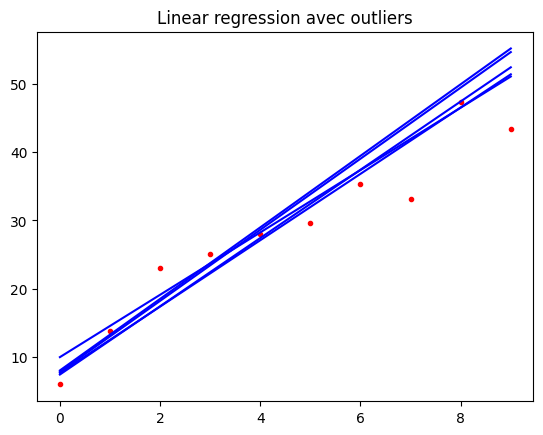

In [7]:
...
fig = plt.figure()
plt.plot(x, y, 'r.')
for i in range(5):
    print('\n\nEssai numero '+str(i+1))
    x, y = generate_data(n_samples=10, outlier=False)
    # instanciation de sklearn.linear_model.LinearRegression
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

    # representation du resultat

    print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))
    print('s2='+str(s2(y, lr.predict(x[:, np.newaxis]))))
    
    plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
    #plt.legend(('Data', 'Linear Fit'), loc='lower right')
    plt.title('Linear regression sans outliers')
plt.show()
fig = plt.figure()
plt.plot(x, y, 'r.')
for i in range(5):
    print('\n\nEssai numero '+str(i+1))
    x, y = generate_data(n_samples=10, outlier=True)
    # instanciation de sklearn.linear_model.LinearRegression
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

    # representation du resultat

    print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))
    print('s2='+str(s2(y, lr.predict(x[:, np.newaxis]))))
    
    plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
    #plt.legend(('Data', 'Linear Fit'), loc='lower right')
    plt.title('Linear regression avec outliers')
plt.show()


La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable i, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les j, où  \hat{y_{(i)j}} est l'estimation de y_j à partir d'un modele  linéaire appris sans l'observation i.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


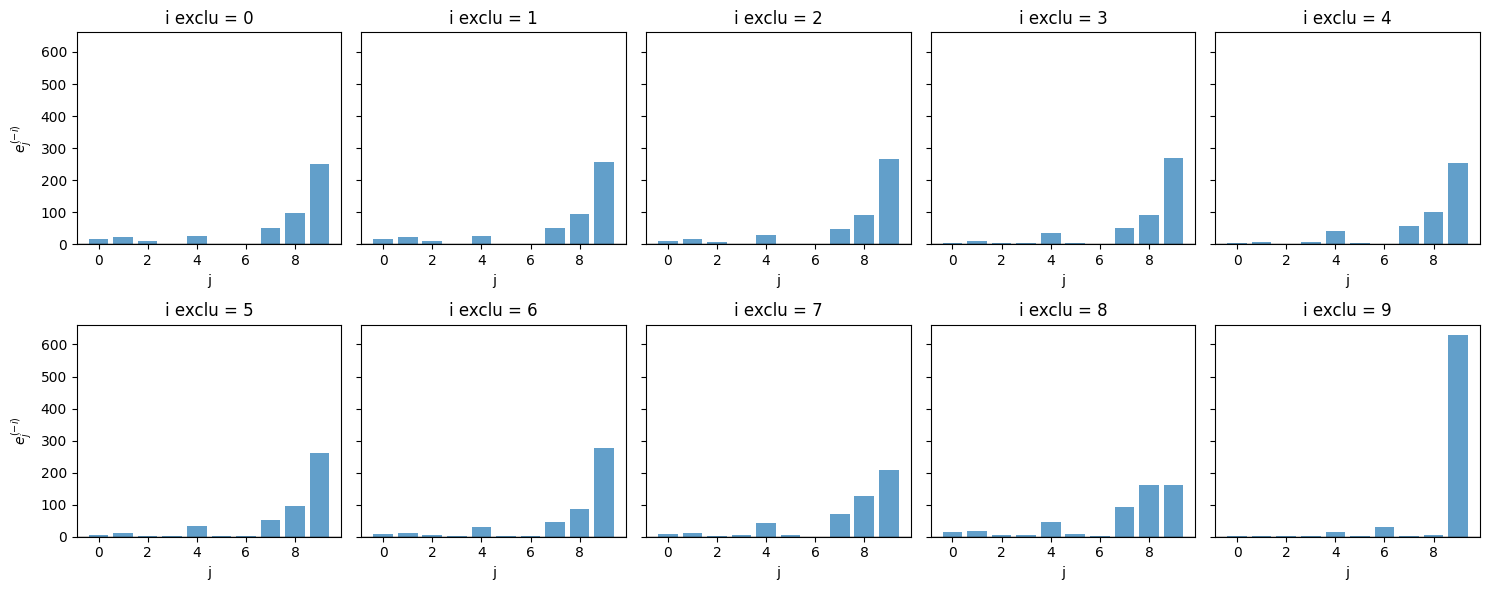

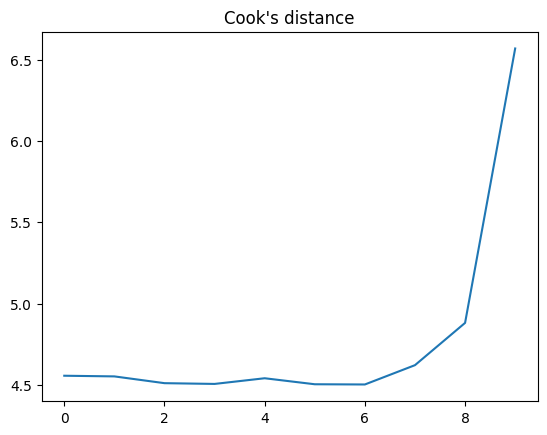

In [8]:
x, y = generate_data(n_samples=10, outlier=True)
n=len(x)
erreur= np.zeros((n,n))
for i in range(n):
    x_del_i = np.delete(x, i)
    y_del_i = np.delete(y, i)
    lr = LinearRegression()
    lr.fit(x_del_i[:, None], y_del_i)
    y_pred_all = lr.predict(x[:, None])   # prédictions pour tous j avec le modèle entraîné sans i
    erreur[:, i] =( y - y_pred_all)**2 # e_j^{(-i)}

# Tracé e_j^{(-i)} en fonction de j
j_idx = np.arange(n)

# Création des sous-figures (ici 2 lignes x 5 colonnes)
fig, axes = plt.subplots(2, 5, figsize=(15, 6), sharey=True)
axes = axes.flatten()

for i in range(n):
    axes[i].bar(j_idx, erreur[:, i], alpha=0.7)
    axes[i].axhline(0, color='k', linewidth=1)
    axes[i].set_title(f"i exclu = {i}")
    axes[i].set_xlabel("j")
    if i % 5 == 0:  # afficher ylabel seulement au début de chaque ligne
        axes[i].set_ylabel(r"$e_j^{(-i)}$")

plt.tight_layout()
plt.show()

# # Cooks distance
cooks_d = np.sum(erreur, axis=0) / (2 * s2(y, LinearRegression().fit(x[:, None], y).predict(x[:, None])))
figure = plt.figure()
plt.plot(x, cooks_d)
plt.title("Cook's distance")
plt.show()   
    

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [9]:
def profil_residuel(x, y, i):
    x_del_i = np.delete(x, i)
    y_del_i = np.delete(y, i)
    lr = LinearRegression()
    lr.fit(x_del_i[:, np.newaxis], y_del_i)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
    y_j=lr.predict(x[:, np.newaxis])
    
    return y - y_j

In [10]:
...

Ellipsis

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [11]:
def cook(x, y, i):
    erreur=profil_residuel(x, y, i)
    di=  np.sum(erreur**2, axis=0)  / (2 * s2(y, lr.predict(x[:, np.newaxis])))
    
    return di

#### <span style="color:blue">REPONSE 4.2.c :</span> 


<Figure size 640x480 with 0 Axes>

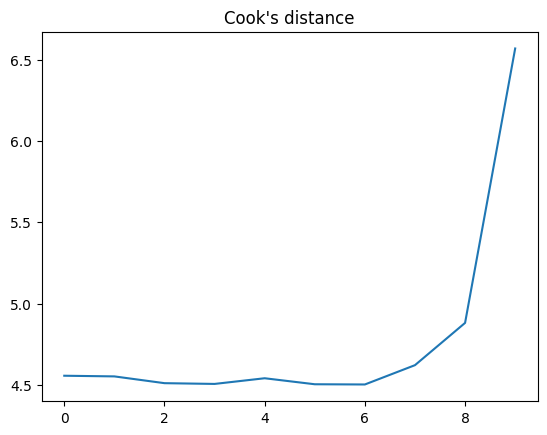

In [12]:
...
erreur= np.zeros((len(x),len(x)))
for i in range(len(x)):
    erreur[:,i]=profil_residuel(x, y, i)
figure = plt.figure()
écooks_d = [cook(x, y, i) for i in range(len(x))]
figure = plt.figure()
plt.plot(x, cooks_d)
plt.title("Cook's distance")
plt.show()   


## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [13]:
from scipy.stats import t
x, y = generate_data(n_samples=20, outlier=True,b_1=0.2)
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
b_0= lr.intercept_
b_1= lr.coef_[0]
print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))




...

b_0=8.229439881083199 et b_1=0.4896145283187737


Ellipsis